<a href="https://colab.research.google.com/github/vitoraugusto1993/ml-projects/blob/main/XGBoost/Regression/Life%20Expectancy/XGBoost_Life_Expectancy_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# XGBoost to Solve Regression Machine Learning Problems


## TASK 1: Understand the problem statement and business case

*   In this project, we will learn how to build and train regression models using Scikit-learn library.
*   Scikit-learn is a free machine learning library developed for python.
*   Scikit-learn offers several algorithms for classification, regression, ans clustering.
*   In this project, we will learn how to train XGBoost algorithm. XGBoost is the go-to algorithm for most developers and has won several Kaggle competitions.
*   Why does XGBoost work well?
  * Since the technique is an ensemble algorithm, it is very robust and could work well with several data types and complex distributions.
  * XGBoost has a many tunable hyperparameters that could improve model fitting.

## TASK 2: Import key libraries and datasets

In [ ]:
pip install wget

In [ ]:
import wget

URL = "https://files.pythonhosted.org/packages/8a/08/9dee6dfd7f2aad6c30282d55c8f495b4dc1e4747b4e2bdbeb80572ddf312/jupyterthemes-0.20.0-py2.py3-none-any.whl"
wget.download(URL, "jupyterthemes-0.20.0-py2.py3-none-any.whl")

In [ ]:
pip install jupyterthemes-0.20.0-py2.py3-none-any.whl

In [ ]:
from jupyterthemes import jtplot
jtplot.style(theme = 'monokai', context = 'notebook', ticks = True, grid = False)
# setting the style of the notebook to be monokai theme
# this line of code is important to ensure that we are able to see the x and y axes clearly
# If you don't run this code line, you will notice that the xlabel and ylabel on any plot is black on black and it will be hard to see them.

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
# read the csv file
df = pd.read_csv('Life_Expectancy_Data.csv')
df

In [ ]:
# Check the dataframe info
df.info()

In [ ]:
df.describe()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,Polio,Total expenditure,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling
count,2938.000000,2928.000000,2928.000000,2938.000000,2744.000000,2938.000000,2385.000000,2938.000000,2904.000000,2938.000000,2919.000000,2712.00000,2919.000000,2938.000000,2490.000000,2.286000e+03,2904.000000,2904.000000,2771.000000,2775.000000
mean,2007.518720,69.224932,164.796448,30.303948,4.602861,738.251295,80.940461,2419.592240,38.321247,42.035739,82.550188,5.93819,82.324084,1.742103,7483.158469,1.275338e+07,4.839704,4.870317,0.627551,11.992793
std,4.613841,9.523867,124.292079,117.926501,4.052413,1987.914858,25.070016,11467.272489,20.044034,160.445548,23.428046,2.49832,23.716912,5.077785,14270.169342,6.101210e+07,4.420195,4.508882,0.210904,3.358920
min,2000.000000,36.300000,1.000000,0.000000,0.010000,0.000000,1.000000,0.000000,1.000000,0.000000,3.000000,0.37000,2.000000,0.100000,1.681350,3.400000e+01,0.100000,0.100000,0.000000,0.000000
25%,2004.000000,63.100000,74.000000,0.000000,0.877500,4.685343,77.000000,0.000000,19.300000,0.000000,78.000000,4.26000,78.000000,0.100000,463.935626,1.957932e+05,1.600000,1.500000,0.493000,10.100000
50%,2008.000000,72.100000,144.000000,3.000000,3.755000,64.912906,92.000000,17.000000,43.500000,4.000000,93.000000,5.75500,93.000000,0.100000,1766.947595,1.386542e+06,3.300000,3.300000,0.677000,12.300000
75%,2012.000000,75.700000,228.000000,22.000000,7.702500,441.534144,97.000000,360.250000,56.200000,28.000000,97.000000,7.49250,97.000000,0.800000,5910.806335,7.420359e+06,7.200000,7.200000,0.779000,14.300000
max,2015.000000,89.000000,723.000000,1800.000000,17.870000,19479.911610,99.000000,212183.000000,87.300000,2500.000000,99.000000,17.60000,99.000000,50.600000,119172.741800,1.293859e+09,27.700000,28.600000,0.948000,20.700000


## TASK 3: Perform Data Visualization

<Axes: >

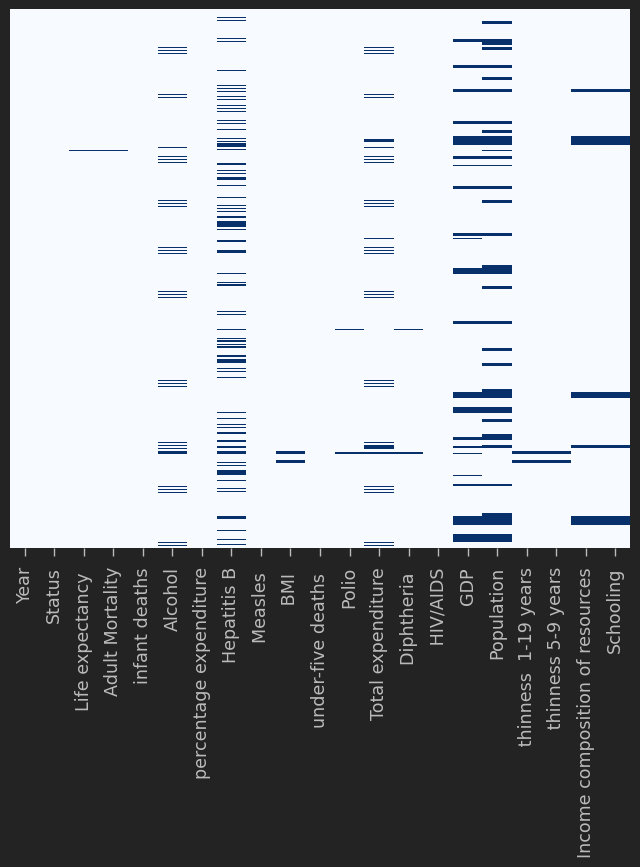

In [ ]:
# check if there are any Null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

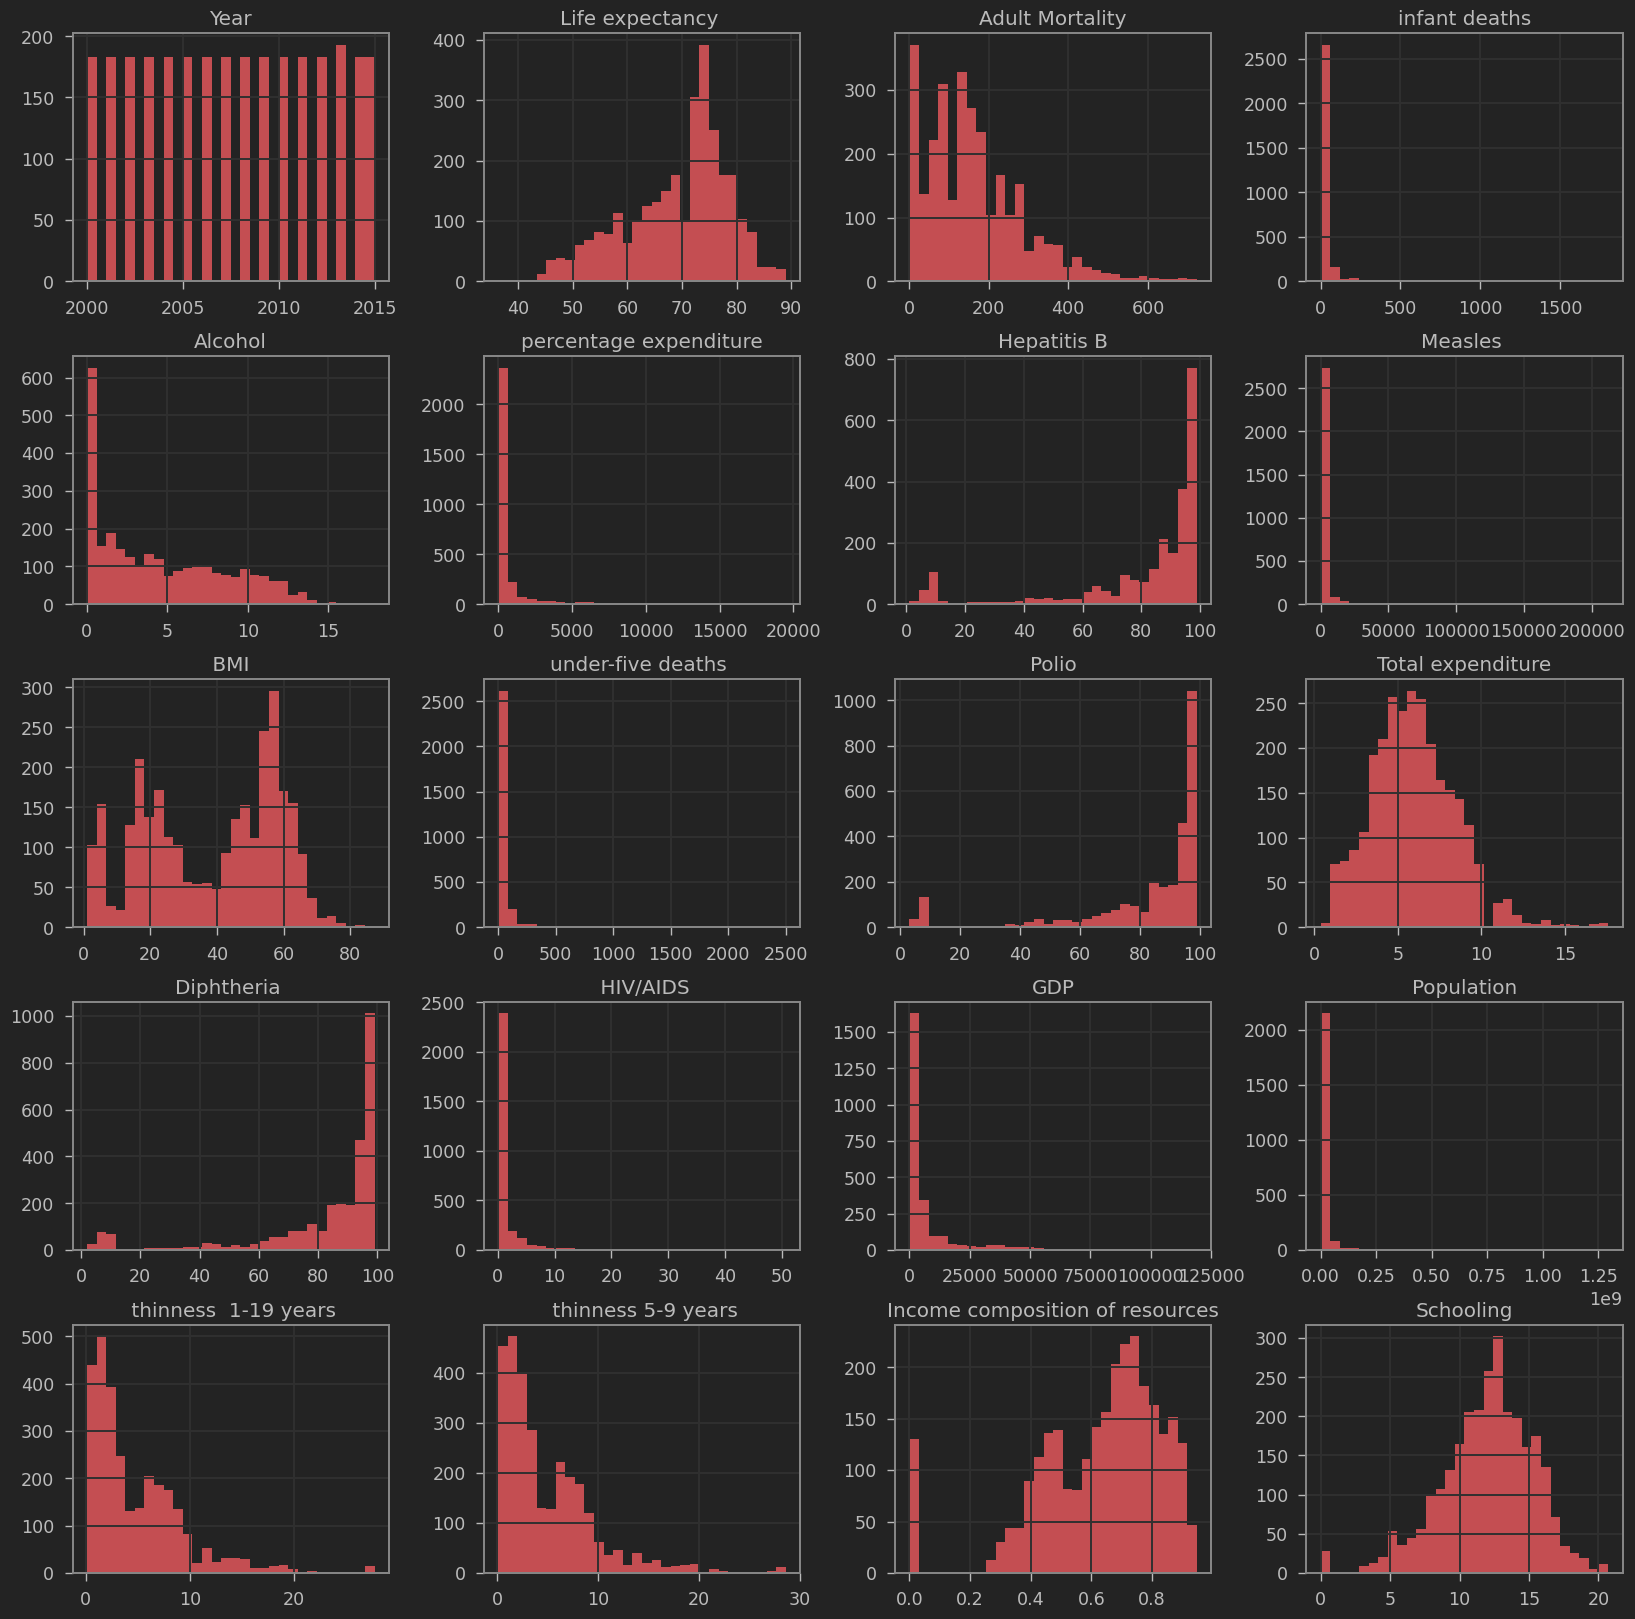

In [ ]:
# Plot the histogram
df.hist(bins = 30, figsize = (20, 20), color = 'r');

In [ ]:
column_name = 'infant deaths'
print("Min {} value: {}".format(column_name, df[column_name].min()))
print("Max {} value: {}".format(column_name, df[column_name].max()))
print("Mean {} value: {}".format(column_name, df[column_name].mean()))
print("Standard deviation {} value: {}".format(column_name, df[column_name].std()))
print("Variance {} value: {}".format(column_name, df[column_name].var()))

Min infant deaths value: 0
Max infant deaths value: 1800
Mean infant deaths value: 30.303948264125257
Standard deviation infant deaths value: 117.92650131339907
Variance infant deaths value: 13906.659712019115


<ipython-input-12-109fa7416aa0>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr_matrix = df.corr()


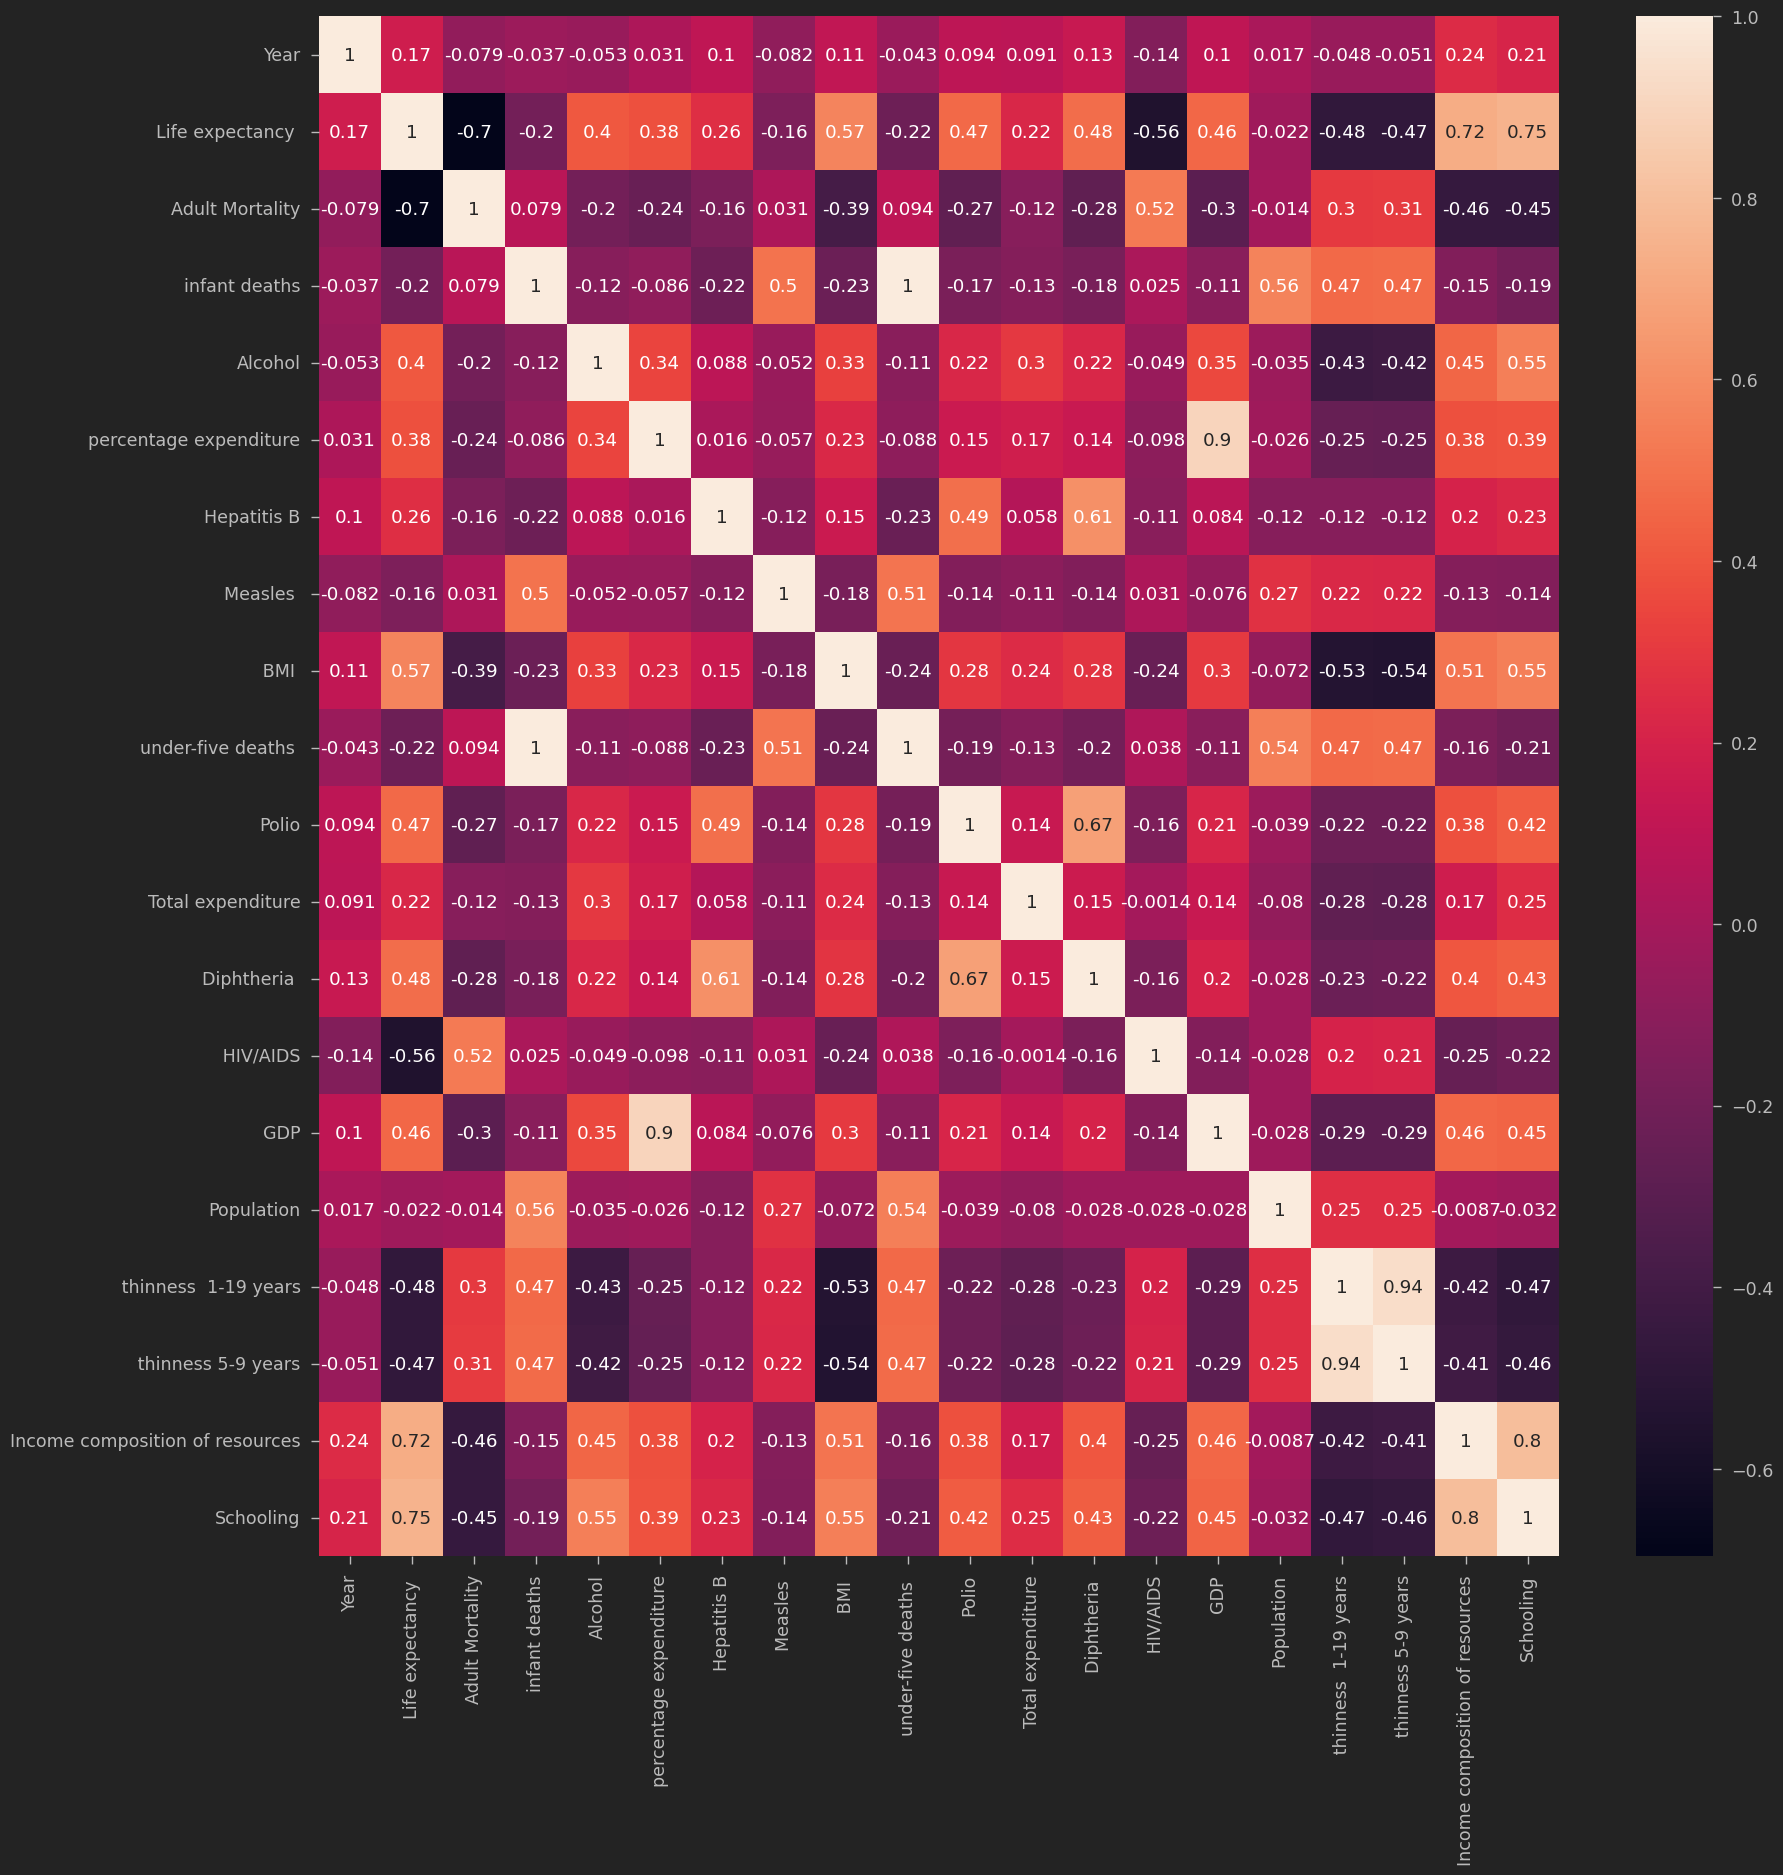

In [ ]:
# Plot the correlation matrix
plt.figure(figsize = (20,20))
corr_matrix = df.corr()
sns.heatmap(corr_matrix, annot = True)
plt.show()

## TASK 4: Perform Feature Engineering

In [ ]:
# Perform one-hot encoding
df = pd.get_dummies(df, columns = ['Status'])

In [ ]:
df.head()

,Year,Life expectancy,Adult Mortality,infant deaths,Alcohol,percentage expenditure,Hepatitis B,Measles,BMI,under-five deaths,...,Diphtheria,HIV/AIDS,GDP,Population,thinness 1-19 years,thinness 5-9 years,Income composition of resources,Schooling,Status_Developed,Status_Developing
0,2015,65.0,263.0,62,0.01,71.279624,65.0,1154,19.1,83,...,65.0,0.1,584.259210,33736494.0,17.2,17.3,0.479,10.1,0,1
1,2014,59.9,271.0,64,0.01,73.523582,62.0,492,18.6,86,...,62.0,0.1,612.696514,327582.0,17.5,17.5,0.476,10.0,0,1
2,2013,59.9,268.0,66,0.01,73.219243,64.0,430,18.1,89,...,64.0,0.1,631.744976,31731688.0,17.7,17.7,0.470,9.9,0,1
3,2012,59.5,272.0,69,0.01,78.184215,67.0,2787,17.6,93,...,67.0,0.1,669.959000,3696958.0,17.9,18.0,0.463,9.8,0,1
4,2011,59.2,275.0,71,0.01,7.097109,68.0,3013,17.2,97,...,68.0,0.1,63.537231,2978599.0,18.2,18.2,0.454,9.5,0,1


In [ ]:
df.isnull().sum()

Year                                 0
Life expectancy                     10
Adult Mortality                     10
infant deaths                        0
Alcohol                            194
percentage expenditure               0
Hepatitis B                        553
Measles                              0
 BMI                                34
under-five deaths                    0
Polio                               19
Total expenditure                  226
Diphtheria                          19
 HIV/AIDS                            0
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
Status_Developed                     0
Status_Developing                    0
dtype: int64

In [ ]:
# Check the number of null values for the columns having null values
df.isnull().sum()[np.where(df.isnull().sum() != 0)[0]]

Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
 BMI                                34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
 thinness  1-19 years               34
 thinness 5-9 years                 34
Income composition of resources    167
Schooling                          163
dtype: int64

In [ ]:
# Since most of the are continous values we fill them with mean
df = df.apply(lambda x: x.fillna(x.mean()),axis=0)

In [ ]:
df.isnull().sum()[np.where(df.isnull().sum() != 0)[0]]

Series([], dtype: int64)

<Axes: >

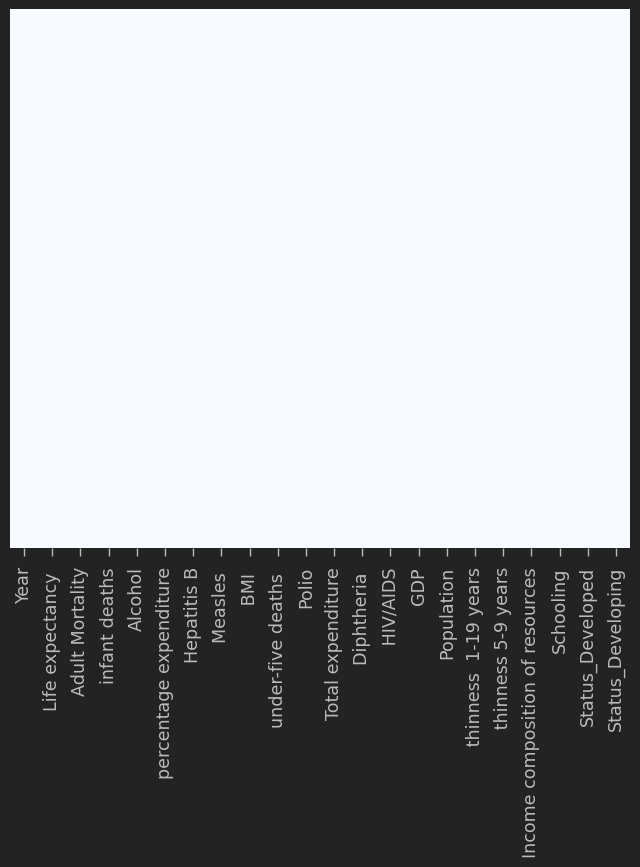

In [ ]:
# check if there are any Null values
sns.heatmap(df.isnull(), yticklabels = False, cbar = False, cmap="Blues")

In [ ]:
# Create train and test data
X = df.drop(columns = ['Life expectancy '])
y = df[['Life expectancy ']]

In [ ]:
# Convert the data type to float32
X = np.array(X).astype('float32')
y = np.array(y).astype('float32')

In [ ]:
# spliting the data into training, testing and validation sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3)

In [ ]:
X_train.shape

(2056, 21)

In [ ]:
X_test.shape

(882, 21)

## TASK 5: Understand XGBoost Algorithm

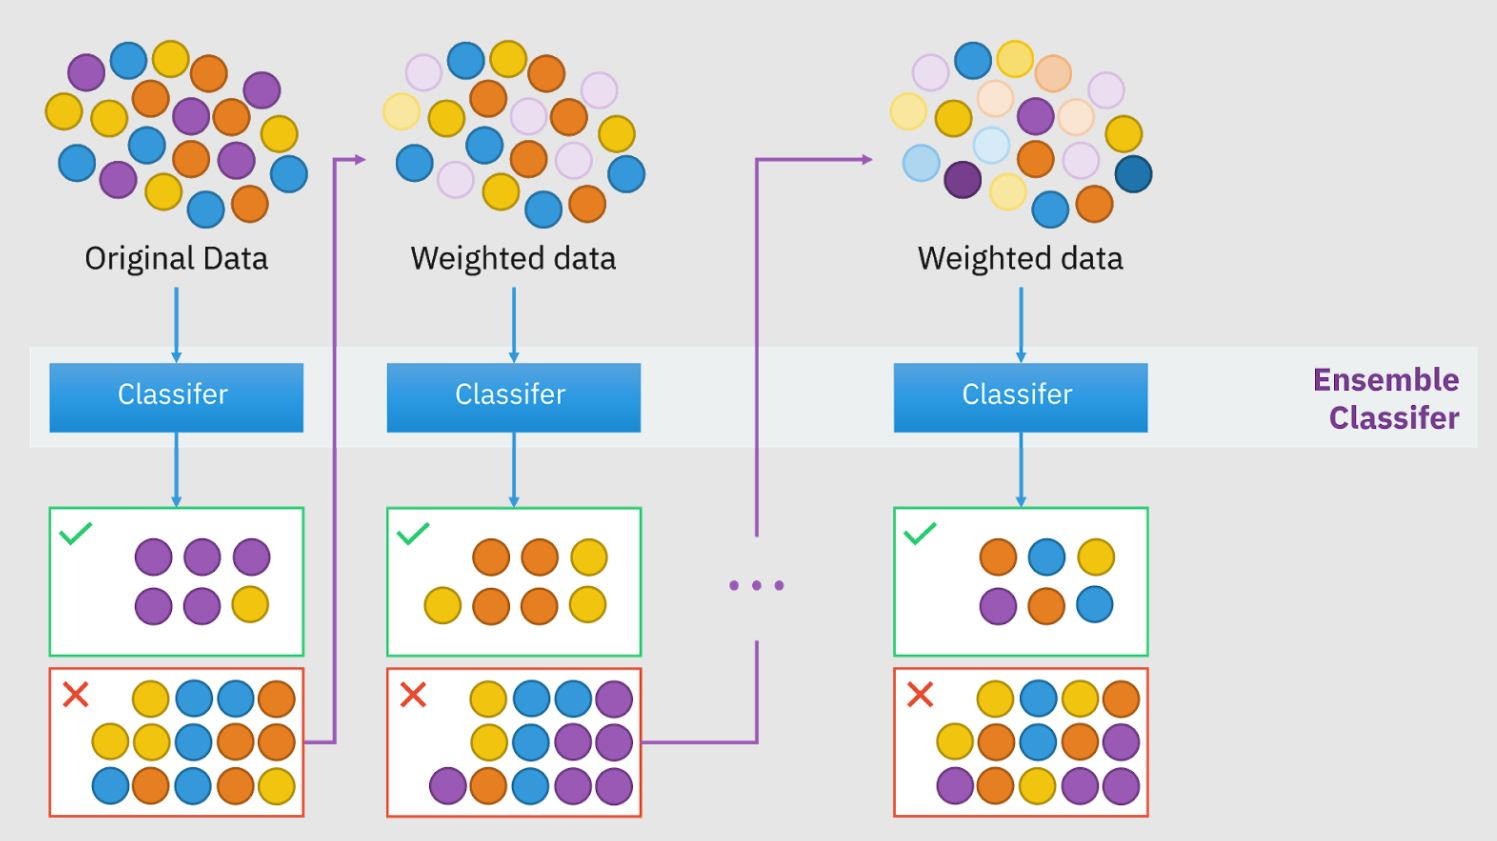

https://arxiv.org/abs/1603.02754

https://xgboost.readthedocs.io/en/stable/index.html

https://pypi.org/project/xgboost/

https://towardsdatascience.com/xgboost-its-genealogy-its-architectural-features-and-its-innovation-bf32b15b45d2

## TASK 6: Train an XGBoost Regression Model

In [ ]:
pip install xgboost

In [ ]:
# Train an XGBoost regressor model
import xgboost as xgb
model = xgb.XGBRegressor(objective ='reg:squarederror', learning_rate = 0.1, max_depth = 30, n_estimators = 100)
model.fit(X_train, y_train)

## TASK 7: Assess Trained XGBoost Model Performance

In [ ]:
# predict the score of the trained model using the testing dataset
result = model.score(X_test, y_test)
print("Accuracy : {}".format(result))

Accuracy : 0.9594271082861263


In [ ]:
# make predictions on the test data
y_predict = model.predict(X_test)
y_predict

In [ ]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt
k = X_test.shape[1]
n = len(X_test)
RMSE = float(format(np.sqrt(mean_squared_error(y_test, y_predict)),'.3f'))
MSE = mean_squared_error(y_test, y_predict)
MAE = mean_absolute_error(y_test, y_predict)
r2 = r2_score(y_test, y_predict)
adj_r2 = 1-(1-r2)*(n-1)/(n-k-1)

print('RMSE =',RMSE, '\nMSE =',MSE, '\nMAE =',MAE, '\nR2 =', r2, '\nAdjusted R2 =', adj_r2)

RMSE = 1.931 
MSE = 3.7305567 
MAE = 1.2390703 
R2 = 0.9594271082861263 
Adjusted R2 = 0.9584363748838108
